In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import copy

In [133]:
df_aug = pd.read_csv('plant_LSTM_eval - Augustus_all.csv')
df_nn = pd.read_csv('final plant eval - ensemble.csv')
# df_nn = pd.read_csv('plant_LSTM_eval - nh7y2_11.csv')
df_meta = pd.read_csv('metadata_plants.csv')

genomes = set(df_aug['genome']).intersection(set(df_nn['genome']))

df_aug = df_aug[df_aug['genome'].isin(genomes)].sort_values('genome').reset_index(drop=True)
df_nn = df_nn[df_nn['genome'].isin(genomes)].sort_values('genome').reset_index(drop=True)
df_meta = df_meta[df_meta['species'].isin(genomes)].sort_values('species').reset_index(drop=True)

df_aug = df_aug.drop(columns=['acc_overall', 'f1_ig', 'f1_utr', 'f1_exon', 'f1_intron', 'legacy_f1_cds','f1_genic'])

# add nn values and metadata to aug df
df_aug['Helixer'] = df_nn['sub_genic']
df_aug['total_len'] = df_meta['total_len']

# add full names
decoder = pd.read_csv('decode.txt', header=None)
df_aug = df_aug.merge(decoder, left_on='genome', right_on=0)

df_plants = df_aug.rename(columns={'sub_genic': 'Aug', 1: 'species'})

# remove training genomes
df_plants = df_plants[~df_plants['genome'].isin(['Athaliana','Bdistachyon','Creinhardtii','Gmax','Mguttatus','Mpolymorpha',
                                                 'Ptrichocarpa','Sitalica','Zmays'])].reset_index(drop=True)


# out of recommended predictive range
algae = ['Vcarteri', 'Creinhardtii', 'Dsalina', 'Czofingiensis', 'MpusillaCCMP1545', 'MspRCC299', 'Olucimarinus', 'CsubellipsoideaC169', 'Pumbilicalis']
df_plants['Outgroup'] = [x in algae for x in df_plants['genome']]

# selected for RNAseq
selected = ['Tcacao', 'Mesculenta', 'Mtruncatula']
df_plants['RNAseq'] = [x in selected for x in df_plants['genome']]




In [134]:
df_plants = df_plants.sort_values(by="Helixer")


In [135]:
# the other plots would probably also be simpler in seaborn 
# if they used this melted dataframe, should we touch them again...
mdf_plants = df_plants.melt(value_vars=['Aug', 'Helixer'], id_vars=['species', 'Outgroup', 'RNAseq'], var_name='Tool')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


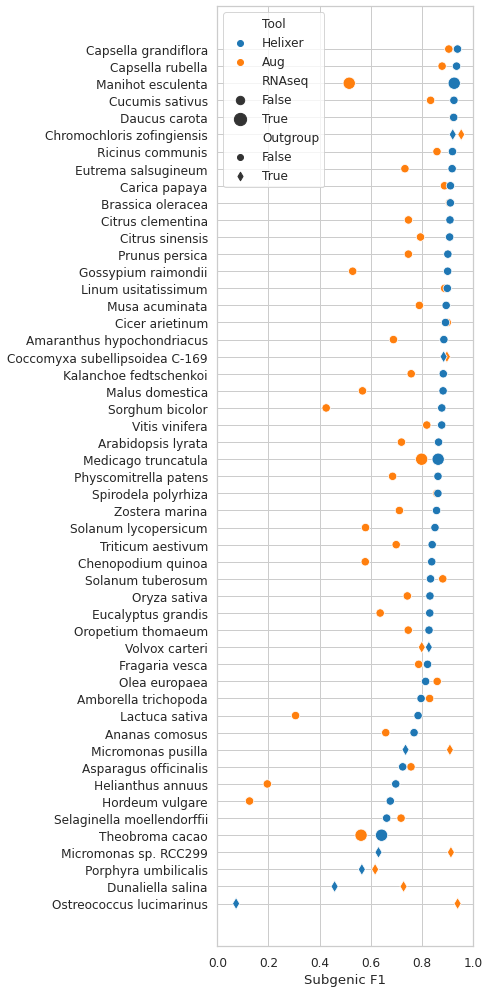

In [154]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
f = plt.figure(figsize=(7,14))


score_plot = sns.scatterplot(y='species',x='value',
                             data=mdf_plants, hue='Tool', hue_order=['Helixer', 'Aug'], sizes=[70, 150],
                             style='Outgroup', markers=['o', 'd'], size='RNAseq')

plt.ylabel("")

plt.xlabel("Subgenic F1")
plt.xlim((0.0, 1.0))
plt.tight_layout()
plt.savefig('RNAseq_plants.eps')

In [89]:
helixer_plot.get_()[0]

(0.0, 1.0)

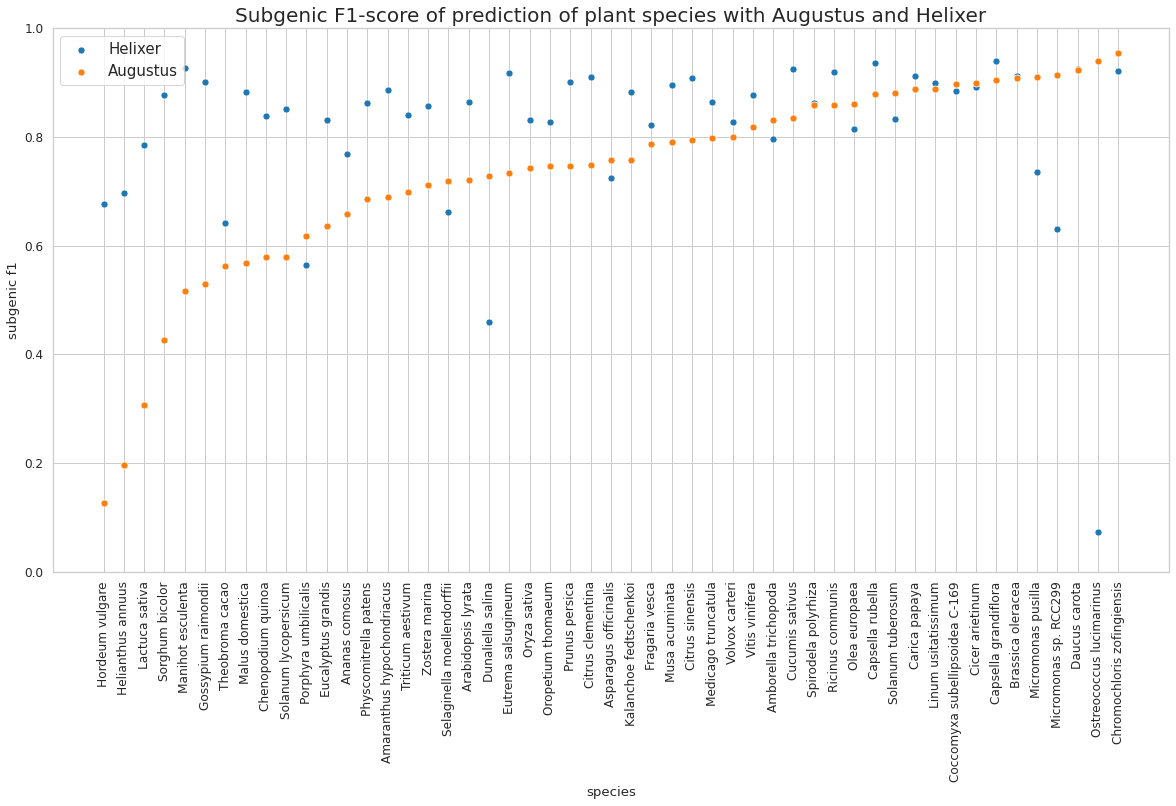

In [137]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 1,sharey=True, figsize=(20,10))
score_plot = sns.scatterplot(x='species',y='Helixer',data=df_plants.sort_values(by="Aug"), s=50)
score_plot = sns.scatterplot(x='species',y='Aug',data=df_plants.sort_values(by="Aug"), s=50)
plt.title("Subgenic F1-score of prediction of plant species with Augustus and Helixer",fontsize=20)
plt.xlabel("species")
plt.ylabel("subgenic f1")
plt.legend(["Helixer","Augustus"],fontsize=15)
plt.xticks(rotation=90);
plt.ylim((0.0, 1.0))

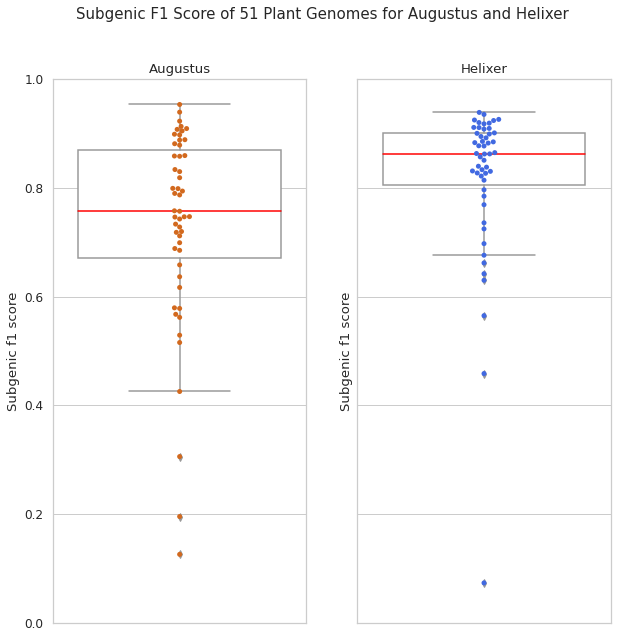

In [138]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 2,sharey=True, figsize=(10,10))

sns.boxplot(y=df_plants["Aug"],medianprops={'color':'red'},ax=axes[0],color="white")
sns.swarmplot(y="Aug", data=df_plants,ax=axes[0],color="chocolate")
axes[0].set_title('Augustus')
axes[0].set_ylabel("Subgenic f1 score")

sns.boxplot(y=df_plants["Helixer"],medianprops={'color':'red'},ax=axes[1],color="white")
sns.swarmplot(y="Helixer", data=df_plants,ax=axes[1],color="royalblue")
axes[1].set_title('Helixer')
axes[1].set_ylabel("Subgenic f1 score")

plt.suptitle("Subgenic F1 Score of 51 Plant Genomes for Augustus and Helixer",fontsize=15)
plt.ylim((0.0, 1.0))
plt.savefig("Plants_overall_boxplot.png", bbox_inches='tight', dpi=200)

(0.0, 1.0)

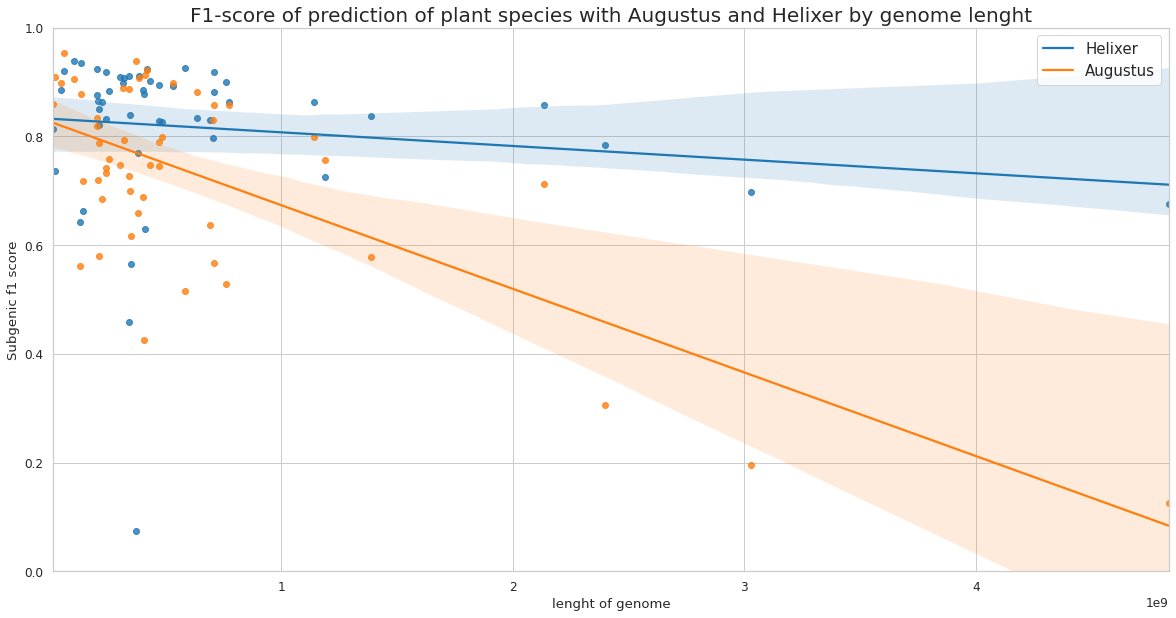

In [141]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 1,sharey=True, figsize=(20,10))
animal_score_plot = sns.regplot(x='total_len',y='Helixer',data=df_plants.sort_values(by="total_len"))
animal_score_plot = sns.regplot(x='total_len',y='Aug',data=df_plants.sort_values(by="total_len"))
plt.title("F1-score of prediction of plant species with Augustus and Helixer by genome lenght",fontsize=20)
plt.xlabel("lenght of genome")
plt.ylabel("Subgenic f1 score")
plt.legend(["Helixer","Augustus"],fontsize=15);
plt.ylim((0.0, 1.0))